-------------------------------------------------------------------------------
# **Forecasting Consumer Price Index**
-------------------------------------------------------------------------------

---------------------------
## **Objective**
---------------------------

The objective of this problem statement is to build a time series model that can forecast the consume price index (CPI) for the next 5 years.

## **Importing the necessary libraries**

**Note**: The Statsmodels library is being downgraded to version 0.12.1 for the purpose of this case study. This is because the library has only recently been updated, and the latest version may / may not give us the desired Time Series output results. Run the code below (!pip install statsmodels==0.12.1) in order to downgrade the library to the right version.

Once the code runs successfully, you may either restart the kernel or restart the Jupyter Notebook before importing the Statsmodels library. It is enough to run the below installation cell for Statsmodels only once. To be sure you are using the correct version of the library, you can use the code in the version check cell right after, and **version 0.12.1** should be good to go.

> !pip install statsmodels == 0.12.1

In [1]:
# Version check 
import statsmodels

statsmodels.__version__

'0.13.5'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

In [3]:
ps_cpi = pd.read_csv('data/PriceStats_CPI.csv')
ps_cpi.head()

,date,PriceStats,CPI
0,24-07-2008,100.00000,100.0
1,25-07-2008,99.99767,100.0
2,26-07-2008,99.92376,100.0
3,27-07-2008,99.91537,100.0
4,28-07-2008,99.89491,100.0


In [4]:
ps_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3448 non-null   object 
 1   PriceStats  3448 non-null   float64
 2   CPI         3448 non-null   float64
dtypes: float64(2), object(1)
memory usage: 87.6+ KB


In [5]:
ps_cpi[ps_cpi.duplicated()]

,date,PriceStats,CPI
3449,NaN,NaN,NaN
3450,NaN,NaN,NaN
3451,NaN,NaN,NaN
3452,NaN,NaN,NaN
3453,NaN,NaN,NaN
...,...,...,...
3727,NaN,NaN,NaN
3728,NaN,NaN,NaN
3729,NaN,NaN,NaN
3730,NaN,NaN,NaN


**Observation:**

We can see that while PriceStats changes daily, the CPI only changes monthly. Hence, the monthly CPI can be obtained by taking the CPI of any day during a month.

Let's first convert the date column into datetime format

In [6]:
ps_cpi['date'] = pd.to_datetime(ps_cpi['date'], infer_datetime_format = True)
ps_cpi.head()

,date,PriceStats,CPI
0,2008-07-24,100.00000,100.0
1,2008-07-25,99.99767,100.0
2,2008-07-26,99.92376,100.0
3,2008-07-27,99.91537,100.0
4,2008-07-28,99.89491,100.0


In [7]:
# PriceStats has a daily variation whereas the CPI data changes monthly
# cpi_monthly = pd.DataFrame(columns = ['Month','CPI']) 
ps_cpi['YearMonth'] = ps_cpi['date'].dt.strftime('%Y - %m') 
ps_cpi.head(10)

,date,PriceStats,CPI,YearMonth
0,2008-07-24,100.00000,100.0000,2008 - 07
1,2008-07-25,99.99767,100.0000,2008 - 07
2,2008-07-26,99.92376,100.0000,2008 - 07
3,2008-07-27,99.91537,100.0000,2008 - 07
4,2008-07-28,99.89491,100.0000,2008 - 07
5,2008-07-29,99.88470,100.0000,2008 - 07
6,2008-07-30,99.88448,100.0000,2008 - 07
7,2008-07-31,99.86741,100.0000,2008 - 07
8,2008-08-01,99.85761,100.5251,2008 - 08
9,2008-08-02,99.85294,100.5251,2008 - 08


In [8]:
cpi = ps_cpi.drop_duplicates('YearMonth', keep = 'last').copy().reset_index().drop(['index','PriceStats'], axis = 1) 
cpi.head(10)

,date,CPI,YearMonth
0,2008-07-31,100.00000,2008 - 07
1,2008-08-31,100.52510,2008 - 08
2,2008-09-30,100.12380,2008 - 09
3,2008-10-31,99.98538,2008 - 10
4,2008-11-30,98.97539,2008 - 11
5,2008-12-31,97.07973,2008 - 12
6,2009-01-31,96.07569,2009 - 01
7,2009-02-28,96.49385,2009 - 02
8,2009-03-31,96.97369,2009 - 03
9,2009-04-30,97.20951,2009 - 04


Splitting the data into train and test sets

In [9]:
cpi_train = (cpi[cpi.YearMonth < '2013-09'].copy()) 
cpi_test = (cpi[cpi.YearMonth >= '2013-09'].copy()) 
cpi_train.shape, cpi_test.shape

((66, 3), (48, 3))

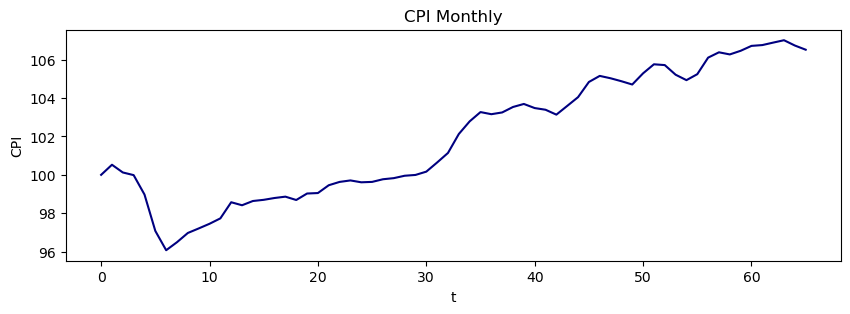

In [10]:
# Let's visualize the time series
fig = plt.figure(figsize=(10,3))
plt.plot(cpi_train.index, cpi_train.CPI, color = 'navy')
plt.xlabel('t')
plt.ylabel('CPI')
plt.title('CPI Monthly')
plt.show()

From the visualization, it is clear that the time series has a deterministic trend. We will try and fit a linear model to
the data and see if that is sufficient to represent the trend. We then subtract this trend from the data.

The linear trend is given by F(t) = 0.16009489280868378*t + (96.74978204432384)


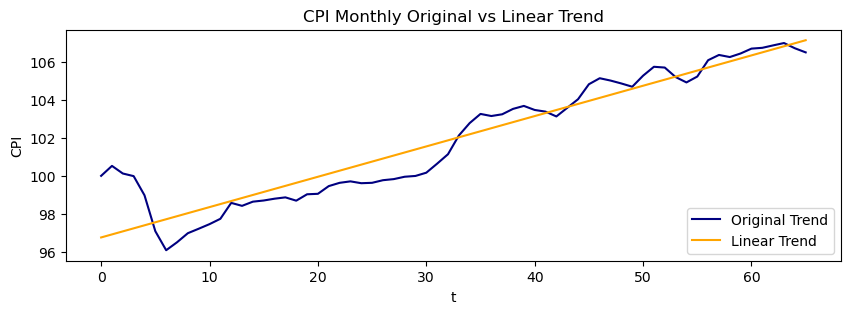

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(np.array(cpi_train.index).reshape(-1, 1), cpi_train.CPI) 
coefficients = [model.coef_[0], model.intercept_] 
print("The linear trend is given by F(t) = " +str(coefficients[0]) + "*t + (" +str (coefficients[1]) + ")") 

fig = plt.figure(figsize=(10,3))
plt.plot(cpi_train.index, cpi_train.CPI, color = 'navy', label = 'Original Trend')

linear_cpi = model.predict(np.array(cpi_train.index).reshape(-1, 1)) 
plt.plot(cpi_train.index, linear_cpi, color = 'orange', label = 'Linear Trend')

plt.xlabel('t')
plt.ylabel('CPI')
plt.title('CPI Monthly Original vs Linear Trend')
plt.legend(loc = 'lower right')
plt.show()

In [12]:
cpi.CPI

0      100.00000
1      100.52510
2      100.12380
3       99.98538
4       98.97539
         ...    
110    112.20390
111    112.79800
112    112.72680
113    112.72950
114          NaN
Name: CPI, Length: 115, dtype: float64

In [13]:
np.log(cpi.CPI).diff(), cpi.CPI.shape

(0           NaN
 1      0.005237
 2     -0.004000
 3     -0.001383
 4     -0.010153
          ...   
 110    0.002989
 111    0.005281
 112   -0.000631
 113    0.000024
 114         NaN
 Name: CPI, Length: 115, dtype: float64,
 (115,))

In [14]:
def selected_method(x):
    if x == 'linear': 
        remaining = cpi_train.CPI - linear_cpi 

        model = LinearRegression().fit(np.array(cpi_train.index).reshape(-1, 1), cpi_train.CPI) 
        coefficients = [model.coef_[0], model.intercept_] 
        linear_cpi_test = model.predict(np.array(cpi_test.index).reshape(-1, 1))  
        remaining_test = cpi_test.CPI - linear_cpi_test 

        test = cpi_test.index 
        train = cpi_train.index

    else: 
        cpi_diff = np.log(cpi.CPI).diff() 
        linear_cpi_test = None

        remaining = cpi_diff[0 : cpi_train.shape[0]] 
        remaining.iloc[0] = 0  

        remaining_test = cpi_diff[cpi_train.shape[0]:].dropna() 
        remaining_test.iloc[0] = 0 

        test = cpi_test.index 
        train = cpi_train.index 

    fig = plt.figure(figsize=(10,3))
    plt.plot(train, remaining, color = "maroon", label = 'Detrended Data') 
    plt.axhline(0, color='gray', ls='-')
    plt.title('CPI time series', loc = 'left')
    plt.legend(loc = 'upper right')
    plt.show()
    return remaining, remaining_test, train, test, linear_cpi_test

In [15]:
x = input('Choose Method:') 

Choose Method:linear


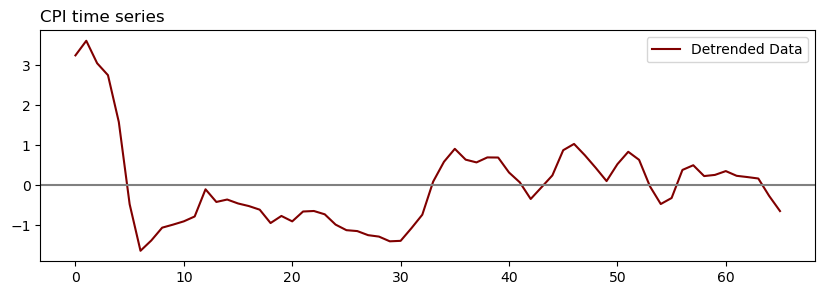

In [16]:
remaining, remaining_test, train, test, linear_cpi_test = selected_method('linear')

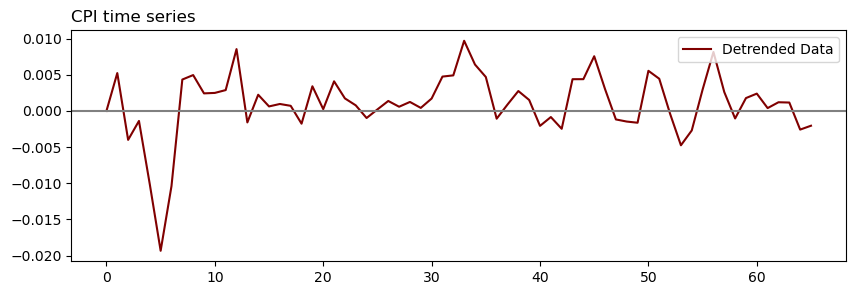

In [17]:
_ = selected_method('other')

Note that, at some stage, we will be required to add the trend back to the data. The function rebuild_diffed() below has been designed for this purpose. We will be calling this function later.

In [18]:
# Let us now create a function that would add the trend back
def rebuild_diffed(series, first_element_original, x, linear_trend):  
    if x == 'linear': 
        final = series + linear_trend 
    else: 
        cumsum = pd.Series(series).cumsum() 
        final = np.exp(cumsum.fillna(0) + first_element_original)
        if first_element_original == 0: 
            final = np.exp(cumsum.fillna(0)) 
    
    return final

As there seems to be no other trend present in this residual, we can take the linear trend to be sufficient and move to the next step, i.e., to deseasonalize the data. However, the above visualization seems to indicate no clear seasonality. Hence, we directly proceed to fit an AR Model on the residual. To do so, we first plot the autocorrelation and partial autocorrelation plots.

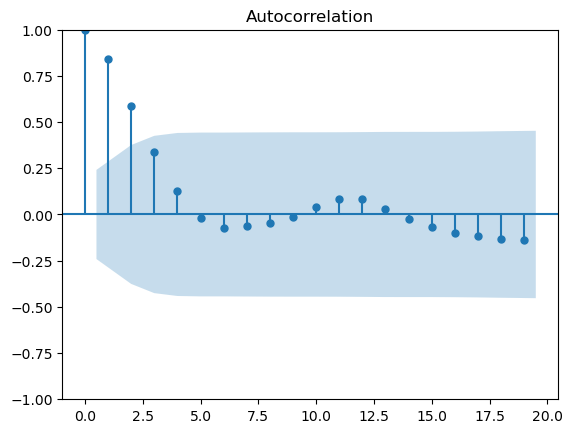

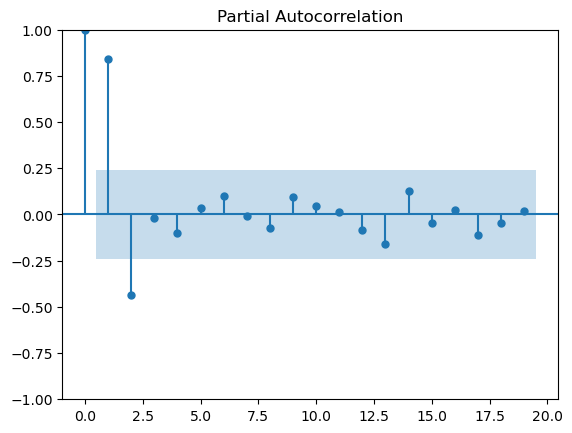

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(remaining) 
plt.show() 

plot_pacf(remaining, method='ywm')
plt.show()

From the above PACF plot, we can see that the highest lag at which the plot extends beyond the statistically
significant boundary is at lag 2. This indicates that an AR Model of lag 2 should be sufficient to fit the data.
However, we can further verify this by calculating the rmse of the fit

Test RMSE for AR(1):0.39539329778393734
Test RMSE for AR(2):0.4213968147033323
Test RMSE for AR(3):0.4052614560873425
Test RMSE for AR(4):0.4746821646771566
Test RMSE for AR(5):0.4596989307247363


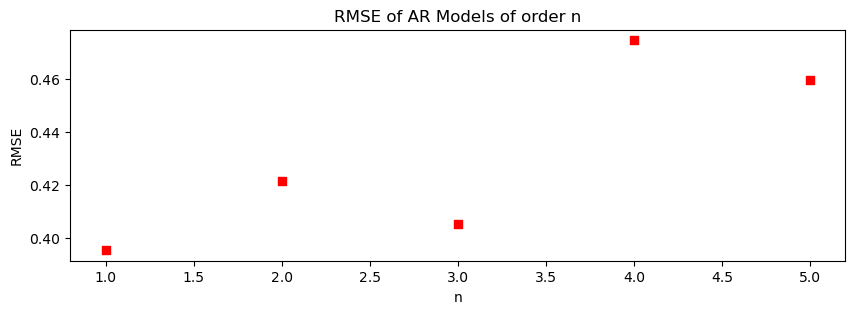

In [20]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

n = 2
rmse_ar = []

for n in range(1, 6):
    model = AutoReg(remaining, lags = n)
    model_fit = model.fit()
    
    coef = model_fit.params
    past = remaining[len(remaining) - n:].values
    past = [past[i] for i in range(len(past))]
    test_predictions = list()
    
    for t in range(len(remaining_test)): 
        length = len(past)
        lag = [past[i] for i in range(length - n, length)]
        pred = coef[0]
        for d in range(n):
            pred += coef[d+1] * lag[n - d - 1]
            
        obs = remaining_test.values[t]
        test_predictions.append(pred)
        past.append(obs)
        
    rmse = (mean_squared_error(remaining_test, test_predictions)) ** 0.5
    rmse_ar.append(rmse)
    print('Test RMSE for AR(' + str(n) +'):' + str(rmse))

fig = plt.figure(figsize=(10,3))
plt.scatter(np.arange(1,6), rmse_ar,marker = "s", color = 'red')
plt.xlabel("n")
plt.ylabel("RMSE")
plt.title("RMSE of AR Models of order n")
plt.show()

The plot above seems to indicate the AR(1) model predictions have the least rmse. While it would have been ideal to have our previous conclusion of the model order of 2 validated by the RMSE, we should note this kind of discrepancy between the two diagnostic methods (rmse and PACF) can occur when working with finite data sets. To proceed, we choose to work with the model order of 2 so we do not miss out on possible lag terms.

In [21]:
## Building the AR(2) Model
n = 2
AR2_model = AutoReg(remaining, lags = n).fit()
coef = AR2_model.params

# Walk forward over time steps in test
past = remaining[len(remaining)-n:].values
past = [past[i] for i in range(len(past))]
test_predictions = list()
training_predictions = AR2_model.predict(start = train[0], end = train[-1])

for t in range(len(remaining_test)):
    length = len(past)
    lag = [past[i] for i in range(length - n , length)]
    pred = coef[0]
    
    for d in range(n):
        pred += coef[d+1] * lag[n-d-1]    
    obs = remaining_test.values[t]
    test_predictions.append(pred)
    past.append(obs)
    
final_training = (rebuild_diffed(training_predictions, np.log(cpi_train.CPI[0]), x, linear_cpi))
final_test = (rebuild_diffed(test_predictions, np.log(cpi_train.iloc[-1].CPI), x, linear_cpi_test))
print(test_predictions)

[-0.758025063533573, -0.7804484568464036, -0.37557087540572787, -0.18918708191505512, 0.3911433197929679, 0.3671806621447813, 0.5526296897974998, 0.49201334396554414, 0.1997017612333451, -0.14674462483913903, -0.06756927385980875, -0.6022760508514255, -1.3625522116259376, -1.989828117892453, -2.460921280248931, -1.7002236221190903, -1.2264760946029798, -1.404054149140648, -0.9155709107885095, -0.8316617418522952, -1.1532480619561636, -1.489935093968315, -1.7598344848376606, -1.8612191537383878, -2.26743867453965, -2.7649019964011456, -2.455567027812518, -2.5600090743052366, -2.1141045344029075, -1.8048590367277784, -1.62003226528152, -1.5045904751124046, -2.0623633620400006, -1.959570215572703, -1.7888307731597008, -1.8747919385539575, -2.304357302438094, -2.2914062283189307, -1.582365220354874, -1.5897745854932102, -1.7837114698583953, -1.5197878507961557, -1.6970458818707794, -1.7403816719819574, -2.0247159262811616, -1.664894385576601, -1.1811183197302793, -1.7215698293395298]


In [22]:
AR2_model.predict(start = test[0], end = test[-1])

66    -0.758025
67    -0.710032
68    -0.583833
69    -0.441640
70    -0.320096
71    -0.234602
72    -0.186005
73    -0.167179
74    -0.168183
75    -0.179612
76    -0.194281
77    -0.207673
78    -0.217628
79    -0.223694
80    -0.226429
81    -0.226815
82    -0.225863
83    -0.224389
84    -0.222938
85    -0.221798
86    -0.221059
87    -0.220686
88    -0.220587
89    -0.220655
90    -0.220798
91    -0.220952
92    -0.221081
93    -0.221169
94    -0.221218
95    -0.221235
96    -0.221232
97    -0.221219
98    -0.221202
99    -0.221188
100   -0.221178
101   -0.221172
102   -0.221169
103   -0.221169
104   -0.221170
105   -0.221172
106   -0.221173
107   -0.221174
108   -0.221175
109   -0.221176
110   -0.221176
111   -0.221176
112   -0.221175
113   -0.221175
dtype: float64

We now plot the final model predictions and the actual observed data together to visualize the fit.

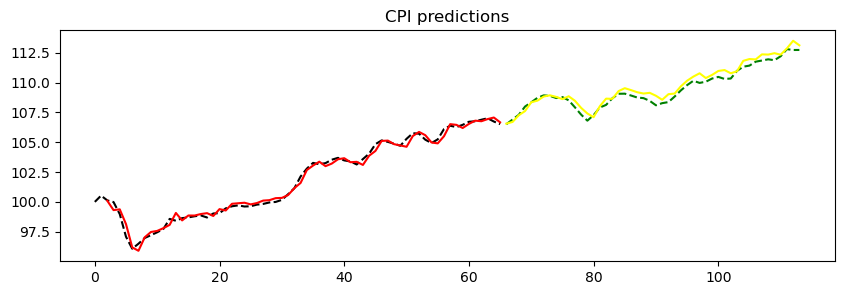

In [23]:
fig = plt.figure(figsize=(10,3))
plt.plot(cpi_train.index, cpi_train.CPI, color = 'black', linestyle = 'dashed', label = 'Training')
plt.plot(cpi_test.index, cpi_test.CPI, color = 'green', linestyle = 'dashed', label = 'Test')

plt.plot(cpi_train.index, final_training, color = 'red', label = 'Final AF')
plt.plot(cpi_test.index, final_test, color = 'yellow', label = 'Final AF')

plt.title("CPI predictions")
plt.show()

We see that the AR(2) Model does predict pretty well, and the mean squared prediction error is small. We can also reaffirm this conclusion by plotting the residuals after the AR(2) predictions are subtracted from the detrended data

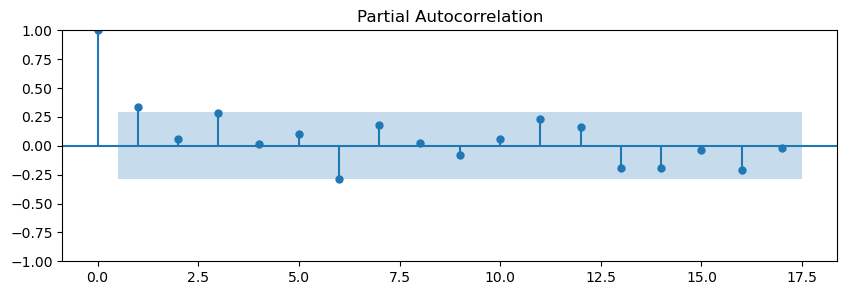

In [24]:
residuals = (remaining_test - test_predictions)[2:]

# Print(residuals)
fig = plot_pacf(residuals, method='ywm')
fig.set_size_inches(10,3)
plt.show()

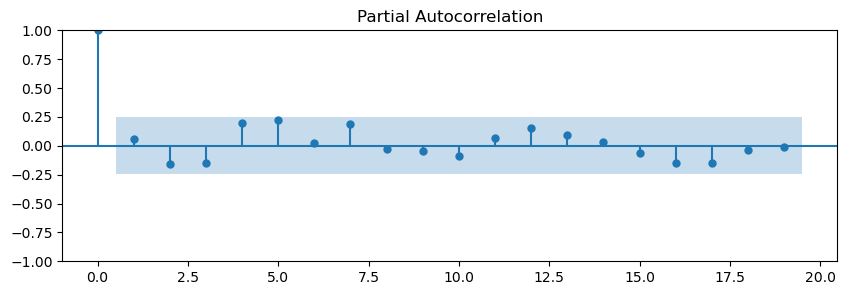

In [25]:
residuals = (remaining - training_predictions)[2:]

# Print(residuals)
fig = plot_pacf(residuals, method='ywm')
fig.set_size_inches(10,3)
plt.show()

In [26]:
rmse = mean_squared_error(cpi_test.CPI,final_test) ** 0.5
print("The rmse of the final fit is " + str(rmse))

The rmse of the final fit is 0.42139681470333185


### **Example 1 - AR(1)**

C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


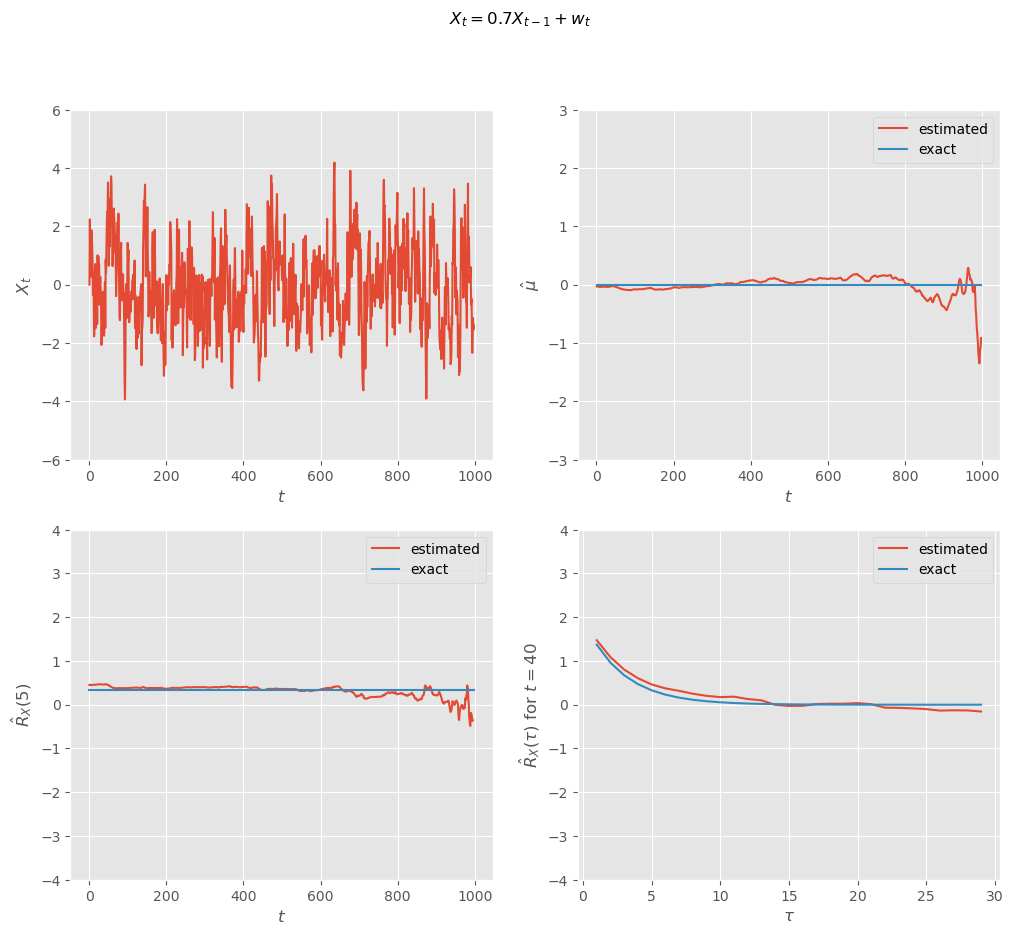

In [27]:
# Example 1

import numpy as np
import matplotlib.pyplot as plt
import warnings

np.random.seed(0)
plt.style.use('ggplot')


X = [0, 0]
xt = X[0]

N = 1000
a = [0.7, 0.]

wtm1 = np.random.normal(0, 1)
wtm2 = np.random.normal(0, 1)

for t in range(N-2):
    wt = np.random.normal(0, 1)
    
    # xt = 0.7*X[-1] + np.random.normal(0, 1)
    xt = a[0] * X[-1] + np.random.normal(0, 1)
    
    # xt = wt + 0.5*wtm1 - 0.7*wtm2
    # xt = 0.7*X[-1] + 0.1*X[-2] + wt + 0.5*wtm1 - 0.7 * wtm2
    X.append(xt)
    
    wtm2 = wtm1
    wtm1 = wt

X = np.array(X)
ts = list(range(1, N-2, 1))
mus = [np.mean(X[t:]) for t in ts]

taus = list(range(1, 30))

def Rx(tau, t = 0):
    mu = np.mean(X[t:])
    return np.mean((X[t : -tau]-mu) * (X[t + tau:] - mu))

def exactRx2(taus, a1, a2, sigma):
    M = np.array([[1, -a1, -a2], [-a1, 1-a2, 0], [-a2, -a1, 1]])
    S = np.array([sigma, 0, 0])
    Rx = list(np.linalg.inv(M)@S.T)
    
    for tau in range(taus[-1]-2):
        Rx.append(Rx[-1] * a1 + Rx[-2] * a2)
    return Rx


fig, (ax1, ax2) = plt.subplots(2,2,figsize = (12, 10))
fig.suptitle('$X_t = 0.7X_{t-1} + w_t$')

ax1[0].plot(ts, X[ts], '-')
ax1[0].set_ylim(-6, 6)
ax1[0].set_xlabel('$t$')
ax1[0].set_ylabel('$X_t$')

ax1[1].plot(ts, mus, '-', label = "estimated")
ax1[1].plot(ts, np.zeros_like(ts), '-', label = "exact")
ax1[1].set_ylim(-3, 3)
ax1[1].legend()
ax1[1].set_ylabel(r'$\hat{\mu}$')
ax1[1].set_xlabel('$t$')

ax2[0].plot(ts, [Rx(5, t) for mu, t in zip(mus, ts)], '-', label = "estimated")
ax2[0].plot(ts, exactRx2(taus, a[0], a[1], 1)[5] * np.ones_like(ts), '-', label = "exact")
ax2[0].set_ylim(-4, 4)
ax2[0].legend()
ax2[0].set_ylabel(r'$\hat{R}_X(5)$')
ax2[0].set_xlabel('$t$')

ax2[1].plot(taus, [Rx(tau, 40) for tau in taus], '-', label = "estimated")
ax2[1].plot(taus, exactRx2(taus, a[0], a[1], 1)[1:], '-', label = "exact")
ax2[1].set_ylim(-4, 4)
ax2[1].legend()
ax2[1].set_ylabel(r'$\hat{R}_X(\tau)$ for $t=' + str(40) + '$')
ax2[1].set_xlabel(r'$\tau$')

plt.show()

### **Example 2 - AR(2)**

C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


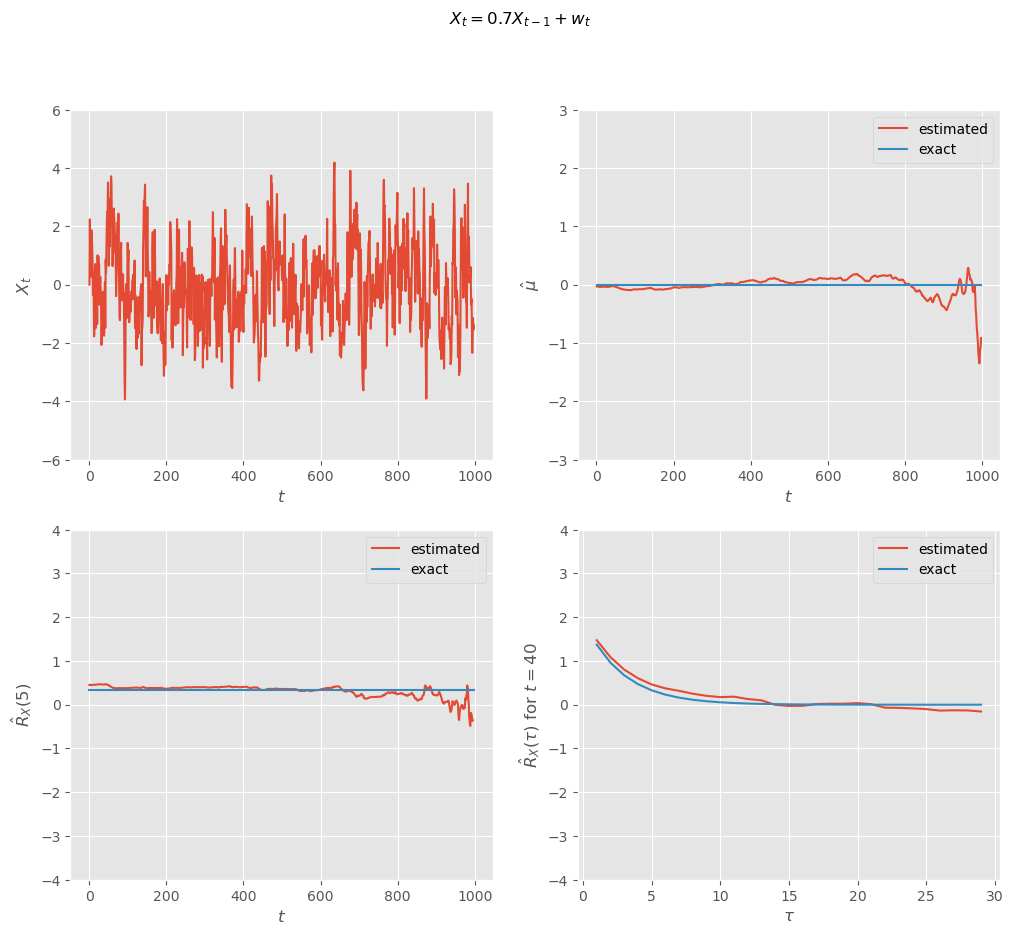

In [28]:
# Example 1

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
plt.style.use('ggplot')

X = [0, 0]
xt = X[0]
N = 1000
a = [0.7, 0.]

wtm1 = np.random.normal(0, 1)
wtm2 = np.random.normal(0, 1)

for t in range(N-2):
    wt = np.random.normal(0, 1)
    
    # xt = 0.7*X[-1] + np.random.normal(0, 1)
    xt = a[0] * X[-1] + np.random.normal(0, 1)
    
    # xt = wt + 0.5*wtm1 - 0.7*wtm2
    # xt = 0.7*X[-1] + 0.1*X[-2] + wt + 0.5*wtm1 - 0.7 * wtm2
    X.append(xt)
    
    wtm2 = wtm1
    wtm1 = wt

X = np.array(X)
ts = list(range(1, N-2, 1))
mus = [np.mean(X[t:]) for t in ts]
taus = list(range(1, 30))

def Rx(tau, t = 0):    
    mu = np.mean(X[t:])
    return np.mean((X[t : -tau]-mu) * (X[t + tau:] - mu))

def exactRx2(taus, a1, a2, sigma):
    M = np.array([[1, -a1, -a2], [-a1, 1-a2, 0], [-a2, -a1, 1]])
    S = np.array([sigma, 0, 0])
    Rx = list(np.linalg.inv(M)@S.T)
    for tau in range(taus[-1]-2):
        Rx.append(Rx[-1] * a1 + Rx[-2] * a2)
    return Rx


fig, (ax1, ax2) = plt.subplots(2,2,figsize = (12, 10))
fig.suptitle('$X_t = 0.7X_{t-1} + w_t$')

ax1[0].plot(ts, X[ts], '-')
ax1[0].set_ylim(-6, 6)
ax1[0].set_xlabel('$t$')
ax1[0].set_ylabel('$X_t$')

ax1[1].plot(ts, mus, '-', label = "estimated")
ax1[1].plot(ts, np.zeros_like(ts), '-', label = "exact")
ax1[1].set_ylim(-3, 3)
ax1[1].legend()
ax1[1].set_ylabel(r'$\hat{\mu}$')
ax1[1].set_xlabel('$t$')

ax2[0].plot(ts, [Rx(5, t) for mu, t in zip(mus, ts)], '-', label = "estimated")
ax2[0].plot(ts, exactRx2(taus, a[0], a[1], 1)[5] * np.ones_like(ts), '-', label = "exact")
ax2[0].set_ylim(-4, 4)
ax2[0].legend()
ax2[0].set_ylabel(r'$\hat{R}_X(5)$')
ax2[0].set_xlabel('$t$')

ax2[1].plot(taus, [Rx(tau, 40) for tau in taus], '-', label = "estimated")
ax2[1].plot(taus, exactRx2(taus, a[0], a[1], 1)[1:], '-', label = "exact")
ax2[1].set_ylim(-4, 4)
ax2[1].legend()
ax2[1].set_ylabel(r'$\hat{R}_X(\tau)$ for $t=' + str(40) + '$')
ax2[1].set_xlabel(r'$\tau$')

plt.show()

### **Example 3 - MA(2) with more samples**

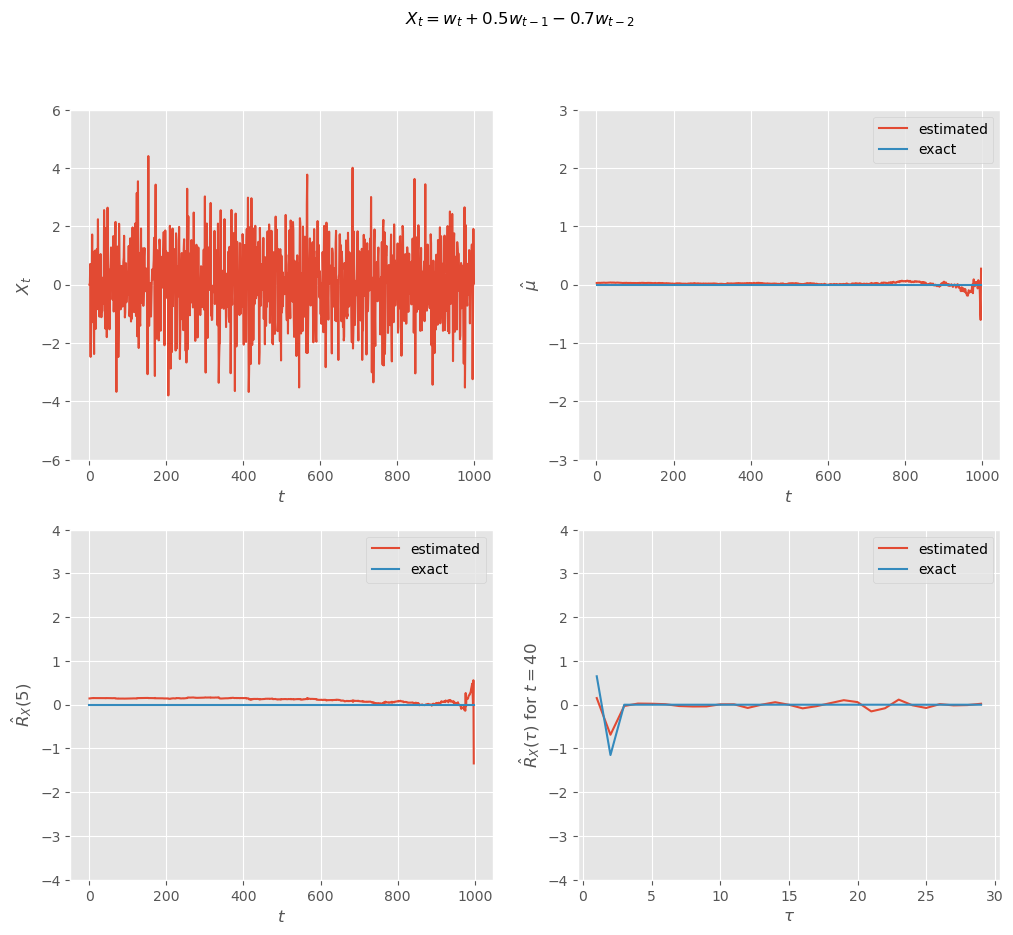

In [29]:
# Example 3
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use('ggplot')

X = [0, 0]
xt = X[0]
N = 1000
b = [1, 0.5, -0.7]

wtm1 = np.random.normal(0, 1)
wtm2 = np.random.normal(0, 1)

for t in range(N-2):
    wt = np.random.normal(0, 1)
    
    # xt = 0.7*X[-1] + np.random.normal(0, 1)
    # xt = a[0]*X[-1] + np.random.normal(0, 1)
    xt = b[0] * wt + b[1] * wtm1 + b[2] * wtm2
    
    # xt = 0.7*X[-1] + 0.1*X[-2]+ wt + 0.5*wtm1 - 0.7 * wtm2
    X.append(xt)
    
    wtm2 = wtm1
    wtm1 = wt

X = np.array(X)
ts = list(range(1, N-2, 1))
mus = [np.mean(X[t:]) for t in ts]
taus = list(range(1, 30))

def Rx(tau, t = 0):
    mu = np.mean(X[t:])
    return np.mean((X[t : -tau] - mu) * (X[t + tau:] - mu))

def exactRx(tau, b, sigma):
    if tau >= len(b): return 0
    else:
        return sum([b[j] * b[abs(j - tau)] for j in range(len(b))])


fig, (ax1, ax2) = plt.subplots(2,2,figsize = (12, 10))
fig.suptitle('$X_t=w_t+0.5w_{t-1}-0.7w_{t-2}$')

ax1[0].plot(range(N), X, '-')
ax1[0].set_ylim(-6, 6)
ax1[0].set_xlabel('$t$')
ax1[0].set_ylabel('$X_t$')

ax1[1].plot(ts, mus, '-', label = "estimated")
ax1[1].plot(ts, np.zeros_like(ts), '-', label = "exact")
ax1[1].set_ylim(-3, 3)
ax1[1].legend()
ax1[1].set_ylabel(r'$\hat{\mu}$')
ax1[1].set_xlabel('$t$')

ax2[0].plot(ts, [Rx(1, t) for mu, t in zip(mus, ts)], '-', label = "estimated")
ax2[0].plot(ts, exactRx(5, b, 1) * np.ones_like(ts), '-', label = "exact")
ax2[0].set_ylim(-4, 4)
ax2[0].legend()
ax2[0].set_ylabel(r'$\hat{R}_X(5)$')
ax2[0].set_xlabel('$t$')

ax2[1].plot(taus, [Rx(tau, 40) for tau in taus], '-', label = "estimated")
ax2[1].plot(taus, [exactRx(tau, b, 1) for tau in taus], '-', label = "exact")
ax2[1].set_ylim(-4, 4)
ax2[1].legend()

ax2[1].set_ylabel(r'$\hat{R}_X(\tau)$ for $t=' + str(40) + '$')
ax2[1].set_xlabel(r'$\tau$')

plt.show()


### **Example 4 - ARMA with more samples**

C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


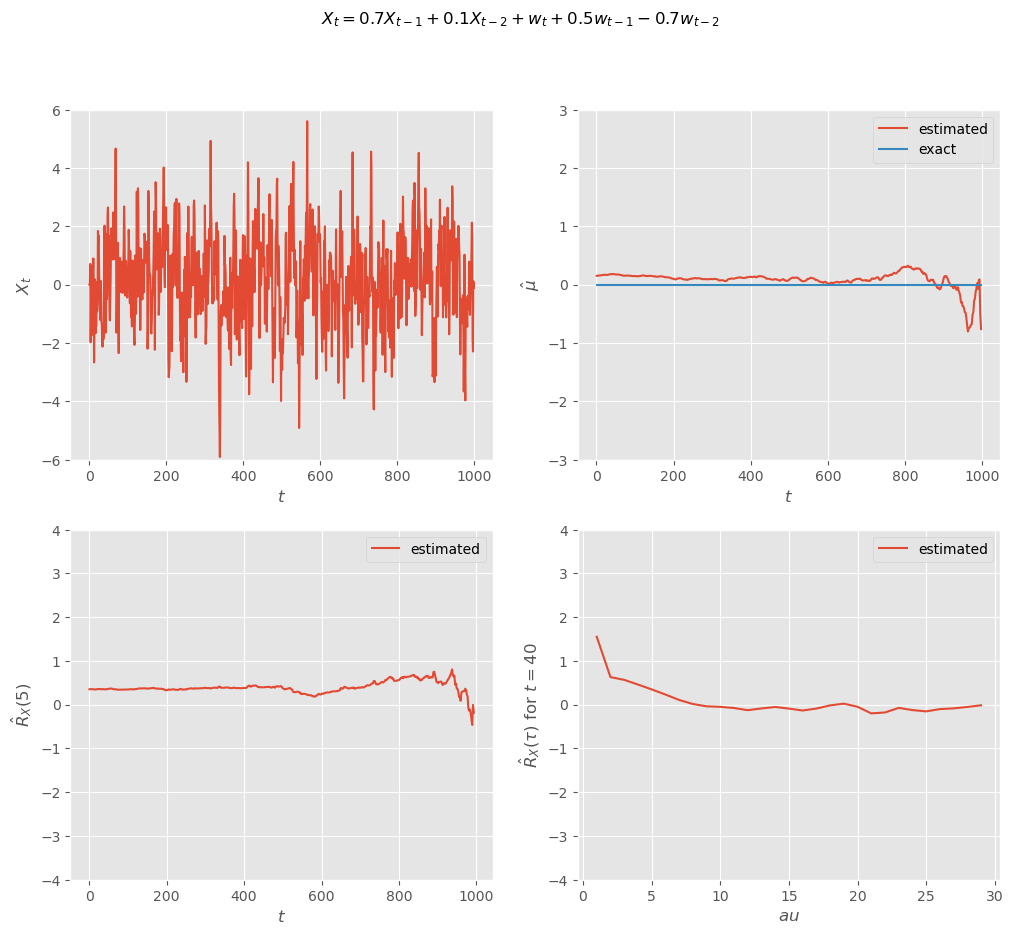

In [30]:
# Example 4
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use('ggplot')

X = [0, 0]
xt = X[0]
N = 1000
b = [1, 0.5, -0.7]

wtm1 = np.random.normal(0, 1)
wtm2 = np.random.normal(0, 1)

for t in range(N-2):
    wt = np.random.normal(0, 1)
    xt = 0.7 * X[-1] + 0.1 * X[-2] + wt + .5 * wtm1 - .7 * wtm2
    X.append(xt)
    wtm2 = wtm1
    wtm1 = wt

X = np.array(X)
ts = list(range(1, N-2, 2))
mus = [np.mean(X[t:]) for t in ts]
taus = list(range(1, 30))

def Rx(tau, t = 0):
    mu = np.mean(X[t:])
    return np.mean((X[t : -tau] - mu) * (X[t + tau:] - mu))

fig, (ax1, ax2) = plt.subplots(2,2,figsize = (12, 10))

fig.suptitle('$X_t=0.7X_{t-1} + 0.1X_{t-2}+ w_t+0.5w_{t-1} - 0.7w_{t-2}$')

ax1[0].plot(range(N), X, '-')
ax1[0].set_ylim(-6, 6)
ax1[0].set_xlabel('$t$')
ax1[0].set_ylabel('$X_t$')

ax1[1].plot(ts, mus, '-', label = "estimated")
ax1[1].plot(ts, np.zeros_like(ts), '-', label = "exact")
ax1[1].set_ylim(-3, 3)
ax1[1].legend()
ax1[1].set_ylabel(r'$\hat{\mu}$')
ax1[1].set_xlabel('$t$')

ax2[0].plot(ts, [Rx(5, t) for mu, t in zip(mus, ts)], '-', label = "estimated")
ax2[0].legend()
ax2[0].set_ylim(-4, 4)
ax2[0].set_ylabel(r'$\hat{R}_X(5)$')
ax2[0].set_xlabel('$t$')

ax2[1].plot(taus, [Rx(tau, 40) for tau in taus], '-', label = "estimated")
ax2[1].legend()
ax2[1].set_ylim(-4, 4)
ax2[1].set_ylabel(r'$\hat{R}_X(\tau)$ for $t=' + str(40) + '$')
ax2[1].set_xlabel('$\tau$')

plt.show()

## **Estimating parameters of ARMA(1) with data from example 2**

## **MLE**

Data generated by: $X_t = a_0X_{t-1}+a_1X_{t-2}+w_t$

Model: $X_t = aX_{t-1}+w_t$ and $X_0=0$.
$$
\begin{align*}
P(X_1,\dots,X_T) &=P(X_1)P(X_2|X_1)\cdots P(X_T|X_{T-1})\\
                 &=\mathcal N(0, 1)\mathcal N(aX_1, 1)\cdots \mathcal N(aX_{T-1}, 1)\\
                 &= (2\pi)^{-T/2}\prod_{t=1}^{T}\exp\left(-\frac{(aX_{t-1}-X_t)^2}{2}\right)
\end{align*}
$$
So, the log likelihood 
$$ -\frac{T}{2}\log(2\pi)-\sum_{t=1}^T\frac{(aX_{t-1}-X_t)^2}{2}$$
Taking derivative with respect to $a$ and setting it to zero,
$$\sum_{t=1}^T(aX_{t-1}-X_t)X_{t-1}=0$$
Thus,
$$a=\frac{\sum_{t=1}^TX_tX_{t-1}}{\sum_{t=1}^TX_{t-1}^2}$$

## **Least Square**

Consider $A = (X_0,\dots,X_{T-1})$ and $b=(X_1,\dots,X_T)$. We minimize
$$\min_{y}||Ay-b||^2$$
The output $y$ is a real number, which is our estimated $a$. We know that the exact solution to this problem is the following:
$$y = (A^TA)^{-1}A^Tb$$

## **Predict with ARMA(2)**

$$
A = \begin{bmatrix}
X_1 & X_0 \\
\vdots & \vdots\\
X_{T-1} & X_{T-2}
\end{bmatrix}
,\; y = \begin{bmatrix}a_0\\ a_1\end{bmatrix},\; 
b = \begin{bmatrix}
X_2\\\vdots\\X_T
\end{bmatrix}
$$
The objective is 
$$\min_{y}||Ay-b||^2$$
with exact solution $$y = (A^TA)^{-1}A^Tb$$

In [31]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(0)
plt.style.use('ggplot')

X = [0, 0]
xt = X[0]
N = 1000
a = [0.7, 0.1]

for t in range(N - 2):
    wt = np.random.normal(0, 1)
    xt = a[0] * X[-1] + wt + a[1] * X[-2]
    X.append(xt)

X = np.array(X)
print(f"True a : {a}")

XtdotXtm1 = X[1:]@X[:-1]
Xtm1dotXtm1 = X[:-1]@X[:-1]

print(f"ARMA(1) MLE a:{XtdotXtm1 / Xtm1dotXtm1: > .4f}")

A = X[:-1].reshape(-1, 1)
b = X[1:]

a_est = np.linalg.inv(A.T@A)@A.T@b

print(f"ARMA(1) Least square a:{a_est[0]: > .4f}")

A = np.array([X[1:-1], X[:-2]]).T
b = X[2:].reshape(-1, 1)

a_est = np.round(np.linalg.inv(A.T@A)@A.T@b, 4)

print(f"ARMA(2) Least square a:{a_est.T[0]}") 

True a : [0.7, 0.1]
ARMA(1) MLE a: 0.7926
ARMA(1) Least square a: 0.7926
ARMA(2) Least square a:[0.6771 0.1457]


--------------------